# 3ML with Fermi GBM TTE  and LAT LLE Data
### Purpose

This demonstrates of you can use LLE data directly in 3ML

For more detail on the Fermi TTE plugin, check out its demo.

#### Let's check it out!

Import **3ML** as always to make sure you have the plugin.

In [1]:
%matplotlib inline
%matplotlib notebook
import numpy as np
from threeML import *

get_available_plugins()

Configuration read from /Users/jburgess/.threeML/threeML_config.yml
Available plugins:

FermiGBMTTELike for Fermi GBM TTE (all detectors)
FermiLATLLELike for Fermi LAT LLE
OGIPLike for All OGIP-compliant instruments
XYLike for n.a.
EventListLike for Generic EventList data
SwiftXRTLike for Swift XRT
VERITASLike for VERITAS


## Obtaining data

Use the LLE and GBM data downloaders to get the data:

In [2]:
# os.path.join is a way to generate system-independent
# paths (good for unix, windows, Mac...)
trigger_number = 'bn080916009'

data_dir_gbm = os.path.join('gbm',trigger_number)
gbm_data = download_GBM_trigger_data(trigger_number,detectors=['n3','n4','b0'],destination_directory=data_dir_gbm,compress_tte=True)


data_dir_lle = os.path.join('lat')

lle_data = download_LLE_trigger_data(trigger=trigger_number,destination_directory=data_dir_lle)

src_selection = "0.-71."

Skipping: glg_cspec_n3_bn080916009_v00.rsp2 exists in /Users/jburgess/coding/3ML/examples/gbm/bn080916009
Skipping: glg_cspec_n4_bn080916009_v00.rsp2 exists in /Users/jburgess/coding/3ML/examples/gbm/bn080916009
Skipping: glg_cspec_b0_bn080916009_v00.rsp2 exists in /Users/jburgess/coding/3ML/examples/gbm/bn080916009
Skipping: glg_tte_n3_bn080916009_v01.fit.gz exists in /Users/jburgess/coding/3ML/examples/gbm/bn080916009
Skipping: glg_tte_n4_bn080916009_v01.fit.gz exists in /Users/jburgess/coding/3ML/examples/gbm/bn080916009
Skipping: glg_tte_b0_bn080916009_v01.fit.gz exists in /Users/jburgess/coding/3ML/examples/gbm/bn080916009
Skipping: gll_cspec_bn080916009_v10.rsp exists in /Users/jburgess/coding/3ML/examples/lat
Skipping: gll_lle_bn080916009_v10.fit exists in /Users/jburgess/coding/3ML/examples/lat
Skipping: gll_pt_bn080916009_v10.fit exists in /Users/jburgess/coding/3ML/examples/lat


### Plugin building

Build our plugins from our data. The LLE plugin is an EventList like the GBM TTE plugin and operates in a similar way. 

Simply select a source interval, background interval(s), etc. (all of which can be changed later) and the plugin will prepare the data for you.

As with the TTE plugin (and any OGIPLike plugin), the data can be saved out to PHA files for cross-checking with XSPEC.

In [3]:
lle = FermiLATLLELike("LLE",
                      os.path.join(data_dir_lle, "gll_lle_bn080916009_v10.fit"),
                      os.path.join(data_dir_lle, "gll_pt_bn080916009_v10.fit"),
                      "-100-0,100-200",
                      src_selection,
                      rsp_file=os.path.join(data_dir_lle, "gll_cspec_bn080916009_v10.rsp"),poly_order=-1)


nai3 = FermiGBMTTELike('NAI3',
                         os.path.join(data_dir_gbm, "glg_tte_n3_bn080916009_v01.fit.gz"),
                         "-10-0,100-200",
                         src_selection,
                         rsp_file=os.path.join(data_dir_gbm, "glg_cspec_n3_bn080916009_v00.rsp2"),poly_order=-1,verbose=False)

nai4 = FermiGBMTTELike('NAI4',
                         os.path.join(data_dir_gbm, "glg_tte_n4_bn080916009_v01.fit.gz"),
                         "-10-0,100-200",
                         src_selection,
                         rsp_file=os.path.join(data_dir_gbm, "glg_cspec_n4_bn080916009_v00.rsp2"),poly_order=-1,verbose=False)

bgo0 = FermiGBMTTELike('BGO0',
                         os.path.join(data_dir_gbm, "glg_tte_b0_bn080916009_v01.fit.gz"),
                         "-10-0,100-200",
                         src_selection,
                         rsp_file=os.path.join(data_dir_gbm, "glg_cspec_b0_bn080916009_v00.rsp2"))




Auto-determined polynomial order: 1


Binned 1-order polynomial fit with the Powell method


Auto-probed noise models:
- observation: poisson
- background: gaussian



WARNING VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


WARNING UserWarning: No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming TLMIN=1



Auto-determined polynomial order: 1


Unbinned 1-order polynomial fit with the Nelder-Mead method


Auto-probed noise models:
- observation: poisson
- background: gaussian


#### What's in the plugin?

The LLE peak function (a common funciton to all EventLists), reveals lots of information about the current selections.

In [4]:
lle.peek()

LLE File Info:


Active Count Error                                  12.2941
Active Counts                                          1821
Active Deadtime                                      5.3301
Active Exposure                                     65.6699
Active Polynomial Counts                            394.438
Active Selections                             [(0.0, 71.0)]
Number of Channels                                       50
Poly fit method                                      Powell
Poly fit type                                        Binned
Polynomial Order                                          1
Polynomial Selections       [[-100.0, 0.0], [100.0, 200.0]]
Significance                                 [42.905261499]
Total N. Events                                       11230
dtype: object

Timing Info:



WARNING UserWarning: You do not have the requests library, cannot get time system from Heasarc at this point.



Fermi MET OBS Start                 2.43216e+08
Fermi MET OBS Stop                  2.43218e+08
Fermi Trigger Time                  2.43217e+08
Fermi UTC OBS Start    2008-09-15T23:56:05.6130
Fermi UTC OBS Stop     2008-09-16T00:29:25.6129
dtype: object

Let's look at the lightcurve of LLE file to check out background fit:

<IPython.core.display.Javascript object>


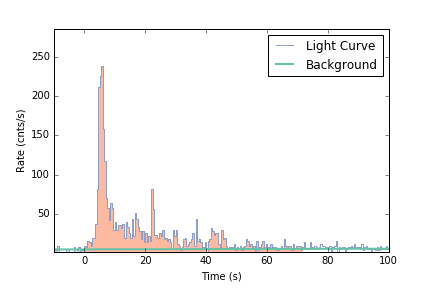

In [5]:
lle.view_lightcurve(-10,100,dt=.5)

And an NaI:

<IPython.core.display.Javascript object>


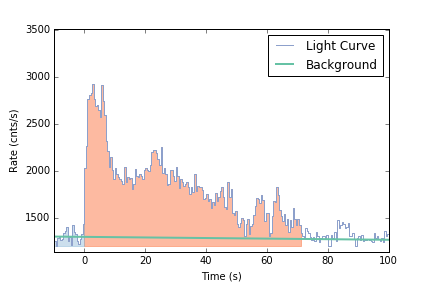

In [6]:
nai3.view_lightcurve(-10,100.,.5)

### Energy selection

Like any OGIPLike, we need to select the energies we would like to fit. LLE data below 50 MeV has a lot of dispersion and should not be selected as indicated by the BAD (red) region.

Range 50000-100000 translates to channels 11-16
Now using 6 channels out of 50


<IPython.core.display.Javascript object>


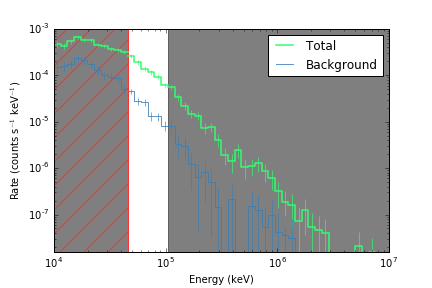

Range 250-43000 translates to channels 1-126
Now using 126 channels out of 128


In [7]:

lle.set_active_measurements("50000-100000")
lle.view_count_spectrum()


nai3.set_active_measurements("10.0-30.0", "40.0-900.0")
nai4.set_active_measurements("10.0-30.0", "40.0-900.0")
bgo0.set_active_measurements("250-43000")


## Fitting!

We are now ready for the standard **3ML** process. We perform and MLE fit here, but Bayesian fitting is also possible.


In [8]:

ra = 121.8
dec = -61.3

data_list = DataList(nai3,nai4,bgo0,lle )

band= Band()

GRB = PointSource( trigger_number, ra, dec, spectral_shape=band )

model = Model( GRB )


In [9]:
jl = JointLikelihood( model, data_list, verbose=False )

res = jl.fit()

Best fit values:



,Best fit value,Unit
bn080916009.spectrum.main.Band.K,0.0149 +/- 0.0007,1 / (cm2 keV s)
bn080916009.spectrum.main.Band.alpha,-1.058 +/- 0.033,
bn080916009.spectrum.main.Band.beta,-2.172 +/- 0.022,
bn080916009.spectrum.main.Band.xp,(5.1 +/- 0.6)e+02,keV



NOTE: errors on parameters are approximate. Use get_errors().


Correlation matrix:



1.00,0.91,-0.96,0.72
0.91,1.00,-0.87,0.62
-0.96,-0.87,1.00,-0.81
0.72,0.62,-0.81,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
total,3322.748431
NAI3,1064.574796
NAI4,1030.174616
BGO0,1198.391008
LLE,29.608011


## Examining our fit

<IPython.core.display.Javascript object>


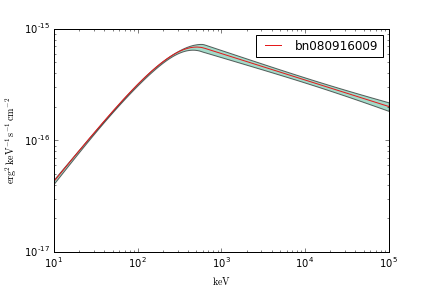

In [10]:
sp = SpectralPlotter(jl)

_=sp.plot_model(y_unit='erg2/(cm2 s keV)', num_ene=200,x_max=1E5)

We can examine our fit with the data:

<IPython.core.display.Javascript object>


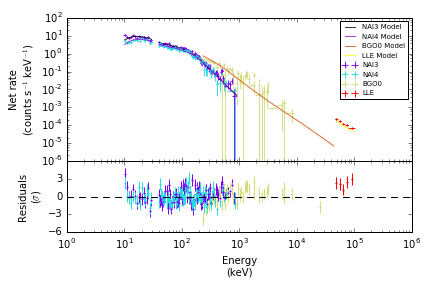

In [11]:
_ = display_ogip_model_counts(jl,min_rate=1,step=False)

In [12]:
res = jl.get_errors()

Name,Value,Unit
bn080916009.spectrum.main.Band.K,0.0149 -0.0006 +0.0007,1 / (cm2 keV s)
bn080916009.spectrum.main.Band.alpha,-1.058 -0.032 +0.034,
bn080916009.spectrum.main.Band.xp,(5.1 -0.6 +0.7)e+02,keV
bn080916009.spectrum.main.Band.beta,-2.172 -0.023 +0.021,


<IPython.core.display.Javascript object>


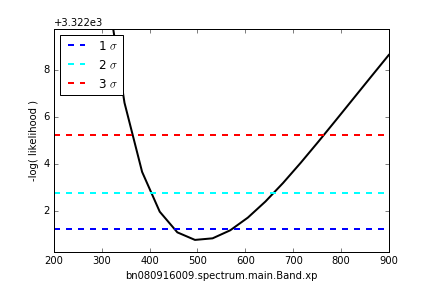

In [13]:
res = jl.get_contours(band.xp,200,900,20)

<IPython.core.display.Javascript object>


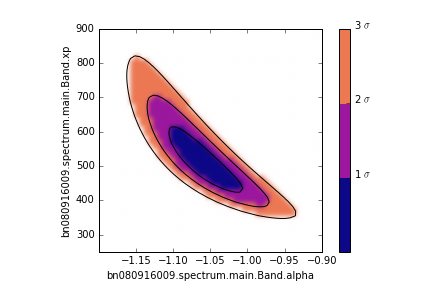

In [14]:
res = jl.get_contours(band.xp,250,900,50,band.alpha,-1.2,-0.9,50)

## Data cleanup

If you like, you can easily delete the data using the return dictionary from the downloader:

In [15]:
cleanup_downloaded_GBM_data(gbm_data)

cleanup_downloaded_LLE_data(lle_data)

Removing: /Users/jburgess/coding/3ML/examples/gbm/bn080916009/glg_cspec_b0_bn080916009_v00.rsp2
Removing: /Users/jburgess/coding/3ML/examples/gbm/bn080916009/glg_tte_b0_bn080916009_v01.fit.gz
Removing: /Users/jburgess/coding/3ML/examples/gbm/bn080916009/glg_cspec_n3_bn080916009_v00.rsp2
Removing: /Users/jburgess/coding/3ML/examples/gbm/bn080916009/glg_tte_n3_bn080916009_v01.fit.gz
Removing: /Users/jburgess/coding/3ML/examples/gbm/bn080916009/glg_cspec_n4_bn080916009_v00.rsp2
Removing: /Users/jburgess/coding/3ML/examples/gbm/bn080916009/glg_tte_n4_bn080916009_v01.fit.gz


Removing: /Users/jburgess/coding/3ML/examples/lat/lle/bn080916009/gll_pt_bn080916009_v10.fit
Removing: /Users/jburgess/coding/3ML/examples/lat/lle/bn080916009/gll_cspec_bn080916009_v10.rsp
Removing: /Users/jburgess/coding/3ML/examples/lat/lle/bn080916009/gll_lle_bn080916009_v10.fit


